# The Monty Hall Problem
This program in an "IPython Notebook" (AKA "[Jupyter](http://jupyter.org/) Notebook") it is basically a sort of computational sketchbook where you can write, test, and interaact with computer code and mix in formatted text to remind youself what you were doing.

This system supports Python and about 40 other computer languages. [See here](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels). (Note that the sentence before this contains a working web link.)

Python is a computer language with very little overhead, the next cell is all we need to set up everything we do below. Note that it does not all need to be done at once, I could have loaded each library as I needed it or **more importantly** as I _discovered_ that I needed it!

In [1]:
%matplotlib inline

from __future__ import division

import random
import numpy             as np
import matplotlib.pyplot as plt

## Solving the Problem (Interactive Exercise)
Usually in my classes the students work together to come up with a code to solve the problem. There are usually numerous ways to do this; it can be interesting to compare and contrast solutions live in class.

### How to choose?
When discussing the problem, students usually conclude that whenever the host or player has a choice, they will make it **randomly**. This is implemented by the Python function `random.choice()` that you will see below. **NB:** Sometimes students want to see other strategies like "always choose the left door" and these can be implemented as well.

### Strategies
There are two pure strategies:

+ **Stay** where the player sticks with their first choice
+ **Switch** where they, well, switch

Our program will implement each of these strategies so we can compare them.

In [5]:
DOORS = (1,2,3)

def hallpicker(strategy):
    prize       = random.choice(DOORS)   # The prize is randomly located
    firstchoice = random.choice(DOORS)   # Our player chooses a door at random
    
    if   strategy == 'stay':
        return firstchoice == prize      # TRUE if win; FALSE if lose
    elif strategy == 'switch':
        hostchoice   = random.choice([x for x in DOORS if x != firstchoice and x != prize])
        secondchoice = [x for x in DOORS if x != firstchoice and x != hostchoice]
        return   secondchoice[0] == prize
    else:
        raise ValueError("The strategy must be 'stay' or 'switch' only.")

Note that **most** of this code is directly relevant to the problem, that is, it is not **fluff** required by the computer language. From about 1995 to about 2006-7 the most important computer languages were "fluffy" with a lot of wasted syntax. The situation has dramatically improved!

Using this code we can play the game once or a few times:

In [6]:
hallpicker('stay')    # True means win; False means lose

False

In [7]:
hallpicker('switch')

True

In [8]:
for i in range(10):              # This is a code that says do it 10 times
    print hallpicker('stay')     # So we can see how the "stay" strategy looks overall

False
True
True
True
False
True
False
False
True
True


In [9]:
for i in range(10):
    print hallpicker('switch')

True
True
True
True
True
False
True
True
True
True


Now the above might be very convincing to you; part of the job of a statistics class is to make it less convincing! We should look at more cases!

The following code allows us to run the experiment 10,000 times all at once. The number is the proportion of **WINS** out of 10,000 plays of the game/strategy. Note that we can override the 10,000 with another number if we need to do so.

In [10]:
def counter(strategy, n=10000):
    return sum(hallpicker(strategy) for i in xrange(n))/float(n)

In [11]:
print "Stay Strategy\t\t",   counter("stay")       # the \t business is to line things up
print "Switch Strategy\t\t", counter("switch")

Stay Strategy		0.3323
Switch Strategy		0.6557


### Graphics
Some people like pictures, so here is a statistical histogram of what happens when we do the counter above 100 times:

The average across 100 runs is  0.66555


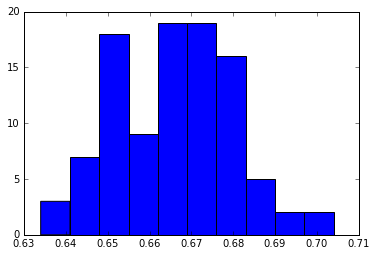

In [12]:
runs = np.zeros(100) 

for ii in range(100):
    runs[ii] = counter("switch", n=1000)     # Make n smaller for speed! SWITCH strategy
    
plt.hist(runs)
print "The average across 100 runs is ", np.mean(runs)

## More Doors!
In every class I have ever taught the first question is always what happens with more doors? The first issue is that there is another random choice to be made by the player. The code above is easily modified:

In [13]:
DOORS = (1,2,3)   # Start by making 3 doors again -- we can't break the previous work!

def multipicker(strategy):
    prize = random.choice(DOORS)
    chc1  = random.choice(DOORS)
    if strategy == 'stay':
        return chc1 == prize
    elif strategy == 'switch':
        hchc = random.choice([x for x in DOORS if x != chc1 and x != prize])
        chc2 = random.choice([x for x in DOORS if x != chc1 and x != hchc])
        return chc2 == prize
    else:
        raise ValueError("The strategy must be 'stay' or 'switch' only.")

def multicounter(strategy, n=10000):
    return sum(multipicker(strategy) for i in xrange(n))/float(n)

An important part of computational thinking is that we need to make sure that when we move into a new case we do not break the previous case; so we start here by testing the case for 3 doors:

In [14]:
print "stay\t", multicounter('stay')
print "switch\t", multicounter('switch')

stay	0.3308
switch	0.6633


In [15]:
DOORS = (1,2,3,4)    # Change to more (4) doors

print "stay\t", multicounter('stay')       # Mathematically this is 1/4 = 0.250
print "switch\t", multicounter('switch')

stay	0.2487
switch	0.372


### What is the Pattern?
Usually students want to see what happens as the number of doors change. The following, which has been easy for most students to produce in classroom settings, looks at 3 through 11 doors:

In [19]:
DOORS      = (1,2)
newDoors   = [3,4,5,6,7,8,9,10,11]
switchRuns = np.zeros(len(newDoors))        # These hold the wins from each strategy
stayRuns   = np.zeros(len(newDoors))

for i,j in enumerate(newDoors):
    DOORS         = DOORS + (j,)            # This changes the DOORS each pass
    switchRuns[i] = multicounter("switch")
    stayRuns[i]   = multicounter("stay")
    
print switchRuns
print stayRuns

[ 0.6656  0.3747  0.2714  0.2118  0.1732  0.1431  0.1251  0.113   0.1016]
[ 0.3294  0.2506  0.2036  0.1638  0.1452  0.13    0.113   0.1033  0.0888]


### Graphs
It is not hard to add a quick statistical graph. Each of the commands below, except for the one that says:

```python
fig, ax = plt.subplots()
```
is directly related to the figure and is fairly obvious for students in a stats class:

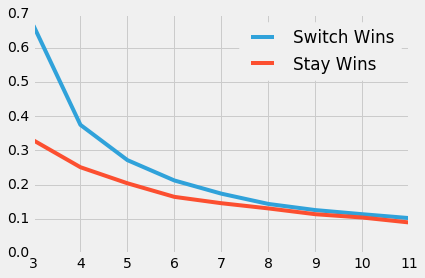

In [20]:
xaxis = np.array(newDoors)

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots()
    ax.plot(xaxis, switchRuns, label="Switch Wins")
    ax.plot(xaxis, stayRuns,   label='Stay Wins')
    ax.legend(loc='upper right')
    ax.grid(True)
    plt.show()

We can zoom in:

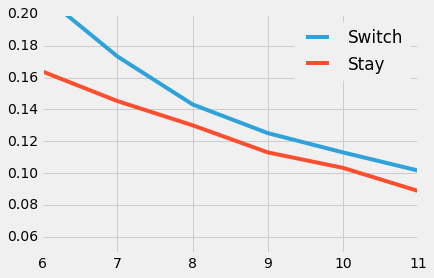

In [21]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots()
    ax.plot(xaxis, switchRuns, label="Switch")
    ax.plot(xaxis, stayRuns,   label='Stay')
    ax.legend(loc='upper right')
    ax.grid(True)
    ax.set_ylim(0.05,0.20)
    ax.set_xlim(6, 11)
    plt.show()

## Show All
So what if Monty shows you all but one door from a set of more than 3? This is a little more complicated as we need to randomly pick a door to hold out when the player has picked the prize, or else it is a little obvious.

So here we assume that Monty opens **all of the doors** except for the player's first choice and just one other.

In [25]:
def showmany(strategy):
    prize = random.choice(DOORS)
    chc1 = random.choice(DOORS)
    if strategy == 'stay':
        return chc1 == prize
    elif strategy == 'switch':
        if chc1 == prize:         # Students noticed that this could be 
            return False          #    dramatically simplified!
        else:
            return True
    else:
        raise ValueError("The strategy must be 'stay' or 'switch' only.")

def showManyCounter(strategy, n=10000):
    return sum(showmany(strategy) for i in xrange(n))/float(n)

In [26]:
DOORS = (1,2,3)

print 'stay\t',   showManyCounter('stay')
print 'switch\t', showManyCounter('switch')    # so far so good....

stay	0.3307
switch	0.6599


In [27]:
DOORS = (1,2,3,4,5)

print 'stay\t',   showManyCounter('stay')
print 'switch\t', showManyCounter('switch')    # ????

stay	0.203
switch	0.7933


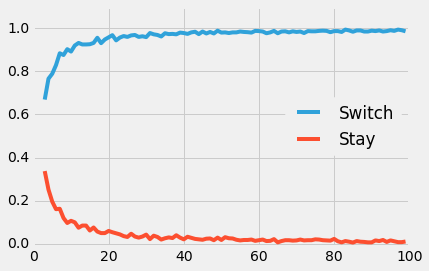

In [30]:
DOORS      = (1,2)
newDoors   = range (3, 100)
switchRuns = np.zeros(len(newDoors))
stayRuns   = np.zeros(len(newDoors))

for i,j in enumerate(newDoors):
    DOORS         = DOORS + (j,)
    switchRuns[i] = showManyCounter("switch", n = 1000)    # Note fewer trials in estimate (for speed of demo)
    stayRuns[i]   = showManyCounter("stay",   n = 1000)

xaxis = np.array(newDoors)

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots()
    ax.plot(xaxis, switchRuns, label="Switch")
    ax.plot(xaxis, stayRuns,   label='Stay')
    ax.legend(loc='right')
    ax.set_ylim(-0.01,1.10)
    ax.grid(True)
    plt.show()

If you think about it, this final result makes sense, too! :-)